In [1]:
# Importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('twitter_news.csv', header = None)
df.columns = ['text', 'tag', 'likes']
df 
#25335 rows total

,text,tag,likes
0,Official ManCity team news for MCIBOU,ManCity MCIBOU,995.0
1,TeamIndia AsiaCup t20WorldCup MSDhoni,TeamIndia AsiaCup t20WorldCup MSDhoni,9943.0
2,BREAKING NEWS popular idol groups MORE MORE ...,prsk FA,99.0
3,nhk news,nhk news,99.0
4,3 nhk news,nhk news,99.0
...,...,...,...
25330,2013,2015,2016.0
25331,Berlin,2022 The Berlin Spectator On August 13th,1961.0
25332,Dal luned al sabato ore 8 30,14 55,18.3
25333,Dal luned al sabato ore 8 30,14 55,18.3


In [3]:
df.dropna(subset=['text'], inplace=True) #23140

In [4]:
df.drop_duplicates(subset=['text'], inplace=True) #17614

In [5]:
df

,text,tag,likes
0,Official ManCity team news for MCIBOU,ManCity MCIBOU,995.0
1,TeamIndia AsiaCup t20WorldCup MSDhoni,TeamIndia AsiaCup t20WorldCup MSDhoni,9943.0
2,BREAKING NEWS popular idol groups MORE MORE ...,prsk FA,99.0
3,nhk news,nhk news,99.0
4,3 nhk news,nhk news,99.0
...,...,...,...
25326,Education Cabinet Secretary,August 18,2022.0
25328,Kung hindi pa,August 14,2022.0
25330,2013,2015,2016.0
25331,Berlin,2022 The Berlin Spectator On August 13th,1961.0


In [6]:
tweet_text = df['text']
tweet_text

0                 Official   ManCity team news for  MCIBOU
1                 TeamIndia  AsiaCup  t20WorldCup  MSDhoni
2        BREAKING NEWS  popular idol groups  MORE MORE ...
3                                                 nhk news
4                                           3     nhk news
                               ...                        
25326                          Education Cabinet Secretary
25328                                        Kung hindi pa
25330                                                 2013
25331                                               Berlin
25332                       Dal luned  al sabato  ore 8 30
Name: text, Length: 17614, dtype: object

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ziyaocui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ziyaocui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
 # Transforming the reviews data by removing stopwords, using regular expressions module to accept only letters,
 # tokenizing those words and then making all the words lower case for consistency.
from wordcloud import STOPWORDS
comments = []
#stop_words = set(stopwords.words('english'))+['SENTENCE','news','s','t',"https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] 
stop_words = ['will','de','f','v','got','e','d','n,''s','u','t','news','new'"https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)

for words in tweet_text:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))

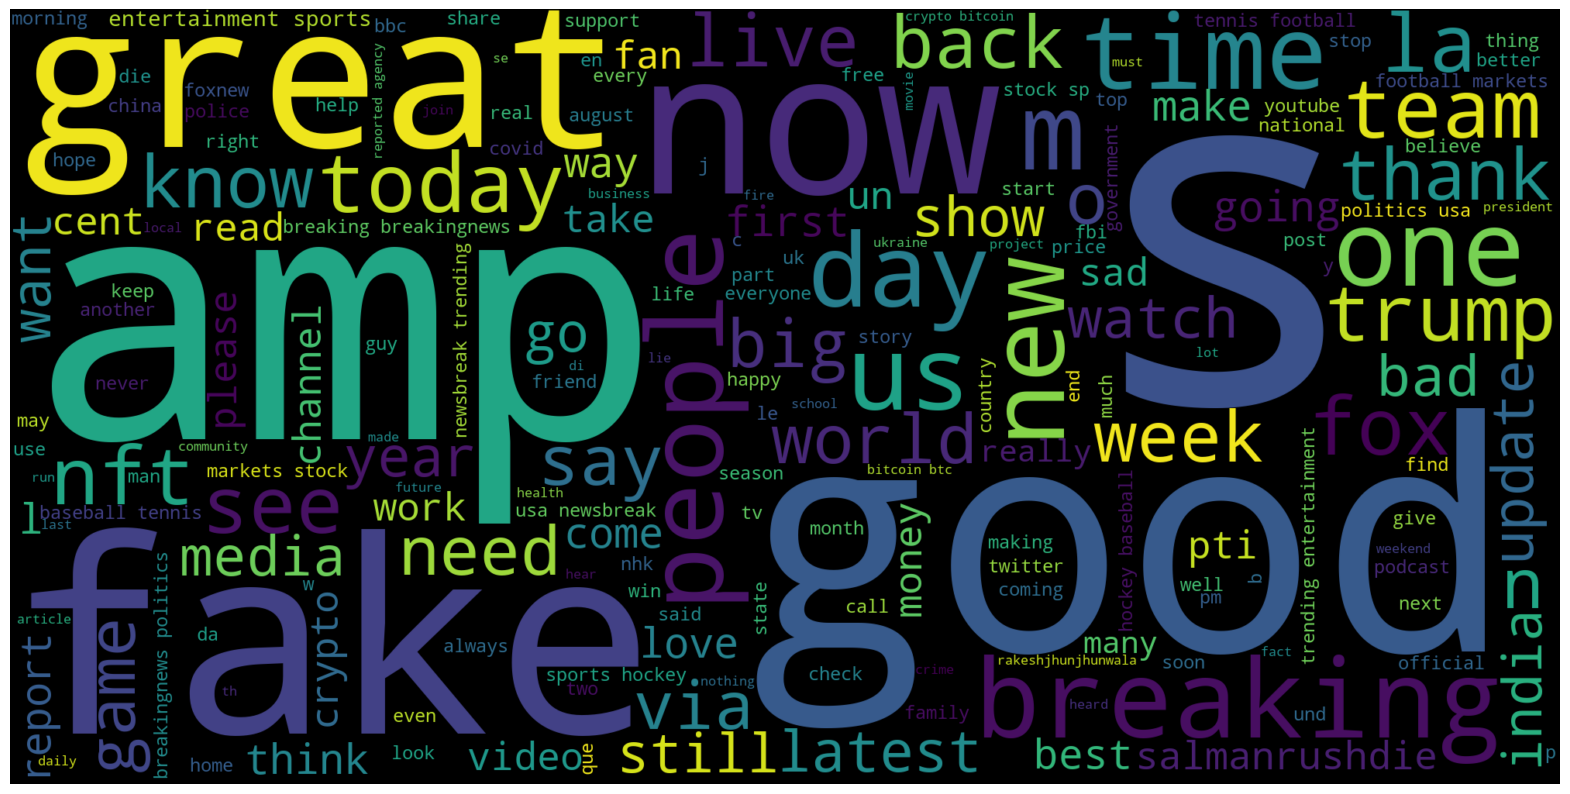

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='black').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package punkt to /Users/ziyaocui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<AxesSubplot:xlabel='Word'>

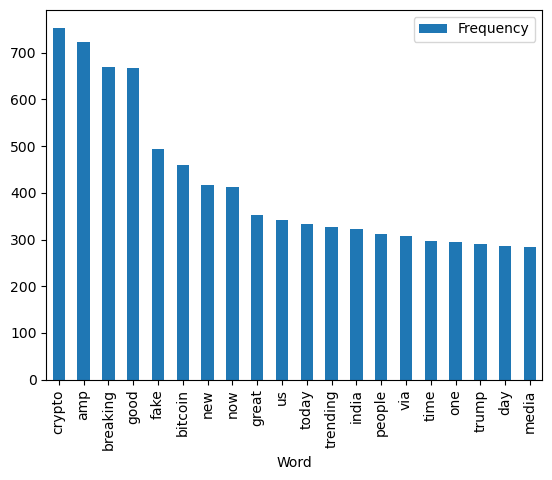

In [10]:
import nltk
nltk.download('punkt')
  
from nltk.tokenize import word_tokenize
from nltk import FreqDist

lower_full_text = tweet_text.str.lower().str.cat(sep=' ') # concatenate all strings in the series into one string
word_tokens = word_tokenize(lower_full_text)
tokens = list()
my_stop_words = ['nft','will','de','m','o','news','s','t',"https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])
dist.plot.bar(x='Word',y='Frequency')


<AxesSubplot:xlabel='Stemmed Word'>

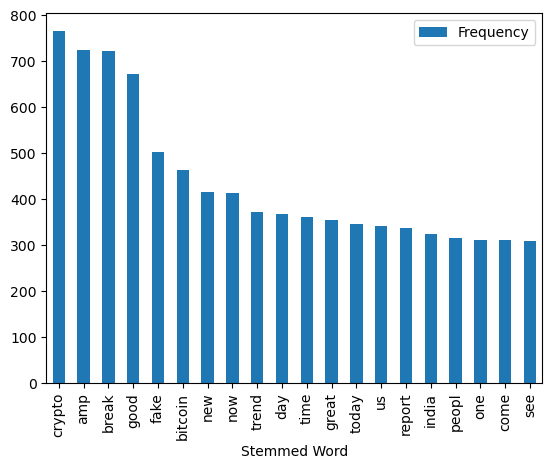

In [11]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Stemmed Word', 'Frequency'])
stemmed_dist.plot.bar(x='Stemmed Word',y='Frequency')

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

#my_stop_words = ["https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(tweet_text)
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ziyaocui/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sid.polarity_scores(tweet_text[15])

{'neg': 0.09, 'neu': 0.616, 'pos': 0.294, 'compound': 0.8074}

In [15]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

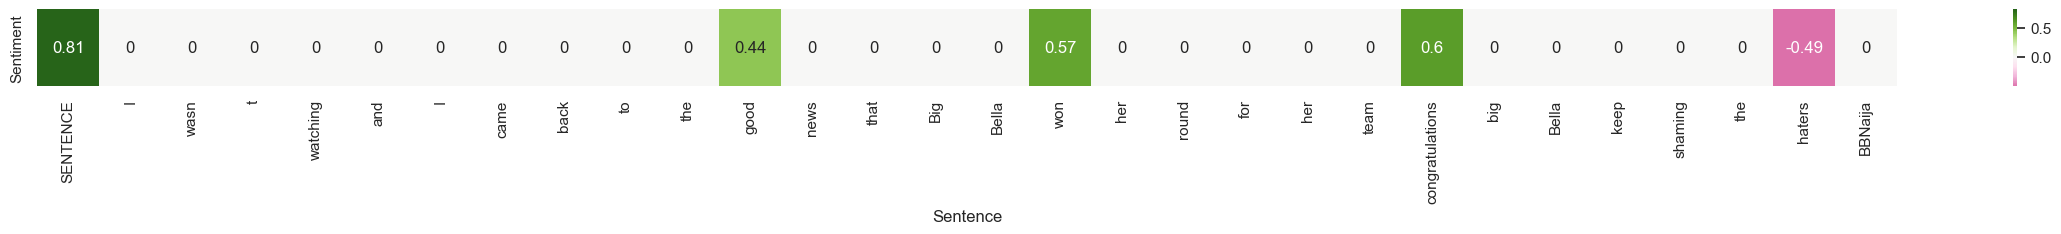

In [16]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + tweet_text[15].split(),
    "Sentiment":[sid.polarity_scores(tweet_text[15])["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet_text[15].split()]
})

In [17]:
# create a new DataFrame column for compound 
df['compound'] = tweet_text.apply(sid.polarity_scores)
df

,text,tag,likes,compound
0,Official ManCity team news for MCIBOU,ManCity MCIBOU,995.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,TeamIndia AsiaCup t20WorldCup MSDhoni,TeamIndia AsiaCup t20WorldCup MSDhoni,9943.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,BREAKING NEWS popular idol groups MORE MORE ...,prsk FA,99.0,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
3,nhk news,nhk news,99.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,3 nhk news,nhk news,99.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...
25326,Education Cabinet Secretary,August 18,2022.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
25328,Kung hindi pa,August 14,2022.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
25330,2013,2015,2016.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
25331,Berlin,2022 The Berlin Spectator On August 13th,1961.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [18]:
#split compound column
# define lambda function to extract values
extract_values = lambda x: pd.Series([x['neg'], x['neu'], x['pos'], x['compound']], 
                                     index=['neg', 'neu', 'pos', 'compound'])

# apply lambda function to create new columns
df[['neg', 'neu', 'pos', 'compound']] = df['compound'].apply(extract_values)

In [19]:
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /Users/ziyaocui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    
    #Converts the text into textblob object and then retuns
    #the polarity.
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity
    #return blob.sentiment.subjectivity

In [21]:
df['sentiment'] = tweet_text.apply(detect_sentiment)

In [22]:
df['sentiment'].unique()

array([ 0.        ,  0.5       ,  0.32878788, ..., -0.2125    ,
        0.8       , -0.11458333])

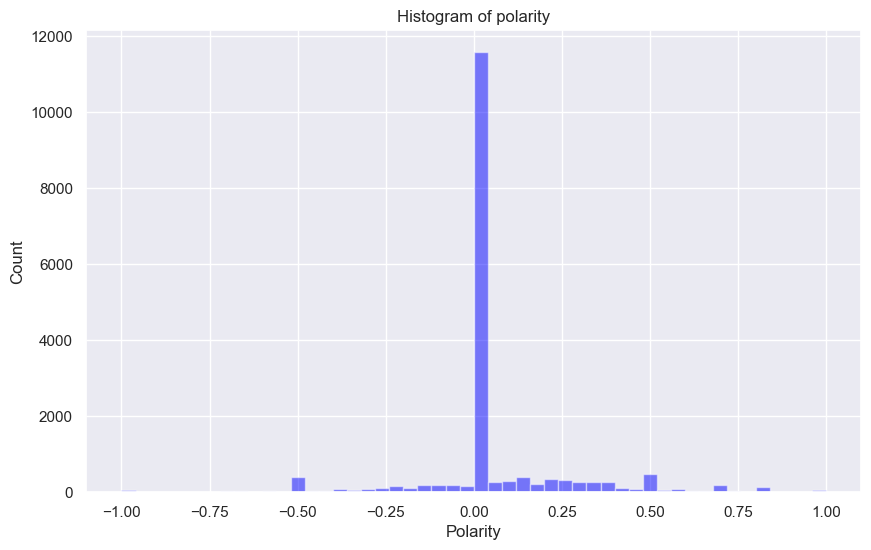

In [23]:
import numpy as np
import matplotlib.pyplot as plt
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

In [24]:
df

,text,tag,likes,compound,neg,neu,pos,sentiment
0,Official ManCity team news for MCIBOU,ManCity MCIBOU,995.0,0.0000,0.0,1.000,0.000,0.0
1,TeamIndia AsiaCup t20WorldCup MSDhoni,TeamIndia AsiaCup t20WorldCup MSDhoni,9943.0,0.0000,0.0,1.000,0.000,0.0
2,BREAKING NEWS popular idol groups MORE MORE ...,prsk FA,99.0,0.6249,0.0,0.769,0.231,0.5
3,nhk news,nhk news,99.0,0.0000,0.0,1.000,0.000,0.0
4,3 nhk news,nhk news,99.0,0.0000,0.0,1.000,0.000,0.0
...,...,...,...,...,...,...,...,...
25326,Education Cabinet Secretary,August 18,2022.0,0.0000,0.0,1.000,0.000,0.0
25328,Kung hindi pa,August 14,2022.0,0.0000,0.0,1.000,0.000,0.0
25330,2013,2015,2016.0,0.0000,0.0,1.000,0.000,0.0
25331,Berlin,2022 The Berlin Spectator On August 13th,1961.0,0.0000,0.0,1.000,0.000,0.0


In [25]:
#try compound not zero first
df_model = df[df['compound'] != 0]
#df_model.to_csv('model_data.csv') #7168
df_model

,text,tag,likes,compound,neg,neu,pos,sentiment
2,BREAKING NEWS popular idol groups MORE MORE ...,prsk FA,99.0,0.6249,0.000,0.769,0.231,0.500000
5,Confira na JP News,HeadlineNews,99.0,0.3680,0.000,0.542,0.458,0.000000
8,There is no national outrage on this news beca...,2ndClassCitizens IndependenceDay2022,99.0,-0.6705,0.333,0.667,0.000,0.000000
10,running full out now and making more than anyb...,com oott stocks,99.0,0.2732,0.000,0.896,0.104,0.328788
13,So Dr Sharma is being interviewed on One News ...,ResignJacinda,99.0,-0.3182,0.078,0.922,0.000,-0.250000
...,...,...,...,...,...,...,...,...
25305,FoxNews Fox News refuses to show the J6 hearin...,TrumpEspionage TrumpIsGoingToJail,1.0,-0.6249,0.135,0.824,0.041,0.025000
25310,Now it is the SocialMedia that has replaced ...,SocialMedia Press Democracy anchors ...,1.0,-0.6705,0.139,0.861,0.000,-0.133333
25318,Update After being stabbed Salman Rushdie is...,atheist humanist,1.0,-0.8660,0.251,0.749,0.000,-0.350000
25319,JerseyPatriots TRDye76 OfficialOPLive Wonder...,OnPatrolNation OnPatrolLive OPLive OP...,1.0,0.5719,0.000,0.684,0.316,1.000000


In [26]:
#use df_model to train, data from tag prediction to test

In [49]:
test_data = pd.read_csv('test_data.csv')
test_data

,Unnamed: 0,text,Actual Tags,Predicted Tags,Predicted_tag_1,Predicted_tag_2,Predicted_tag_3,Predicted_tag_4,Predicted_tag_5,compound,neg,neu,pos,sentiment
0,0,consider following model g x beta u otherwise ...,"('logistic', 'regression')","('regression', 'self study')",regression,self study,NaN,NaN,NaN,0.7650,0.000,0.861,0.139,0.360000
1,1,encountering following problems really know mo...,"('hypothesis testing', 'time series')","('hypothesis testing', 'r', 'regression')",hypothesis testing,r,regression,NaN,NaN,-0.7715,0.184,0.672,0.144,0.244583
2,2,basically attempting recreate results example ...,"('r', 'regression')","('logistic', 'r', 'regression')",logistic,r,regression,NaN,NaN,0.6902,0.042,0.885,0.073,0.111765
3,3,general standardize independent variables regr...,"('r', 'regression')","('r', 'regression')",r,regression,NaN,NaN,NaN,0.9186,0.024,0.817,0.159,0.090789
4,4,let v forecasted value periods v forecasted va...,"('r', 'time series')","('self study', 'time series')",self study,time series,NaN,NaN,NaN,0.8074,0.047,0.844,0.109,-0.146711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2216,number observations occur around city small ar...,"('classification', 'machine learning')","('regression',)",regression,NaN,NaN,NaN,NaN,-0.2732,0.110,0.805,0.085,0.125000
2116,2217,trying model annual tree nut production using ...,"('r', 'time series')","('r', 'regression', 'time series')",r,regression,time series,NaN,NaN,0.8750,0.078,0.738,0.184,0.223810
2117,2218,need understand splitting criteria works two p...,"('classification', 'r')","('machine learning', 'r', 'regression')",machine learning,r,regression,NaN,NaN,0.7506,0.000,0.709,0.291,0.066667
2118,2219,data set trying regression failing situation t...,"('r', 'regression')","('r', 'regression')",r,regression,NaN,NaN,NaN,-0.9984,0.323,0.555,0.122,0.169403


In [50]:
test_data['likes'] = np.random.randint(0, 1000, size=len(test_data))

In [51]:
test_data

,Unnamed: 0,text,Actual Tags,Predicted Tags,Predicted_tag_1,Predicted_tag_2,Predicted_tag_3,Predicted_tag_4,Predicted_tag_5,compound,neg,neu,pos,sentiment,likes
0,0,consider following model g x beta u otherwise ...,"('logistic', 'regression')","('regression', 'self study')",regression,self study,NaN,NaN,NaN,0.7650,0.000,0.861,0.139,0.360000,952
1,1,encountering following problems really know mo...,"('hypothesis testing', 'time series')","('hypothesis testing', 'r', 'regression')",hypothesis testing,r,regression,NaN,NaN,-0.7715,0.184,0.672,0.144,0.244583,320
2,2,basically attempting recreate results example ...,"('r', 'regression')","('logistic', 'r', 'regression')",logistic,r,regression,NaN,NaN,0.6902,0.042,0.885,0.073,0.111765,924
3,3,general standardize independent variables regr...,"('r', 'regression')","('r', 'regression')",r,regression,NaN,NaN,NaN,0.9186,0.024,0.817,0.159,0.090789,153
4,4,let v forecasted value periods v forecasted va...,"('r', 'time series')","('self study', 'time series')",self study,time series,NaN,NaN,NaN,0.8074,0.047,0.844,0.109,-0.146711,618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2216,number observations occur around city small ar...,"('classification', 'machine learning')","('regression',)",regression,NaN,NaN,NaN,NaN,-0.2732,0.110,0.805,0.085,0.125000,399
2116,2217,trying model annual tree nut production using ...,"('r', 'time series')","('r', 'regression', 'time series')",r,regression,time series,NaN,NaN,0.8750,0.078,0.738,0.184,0.223810,527
2117,2218,need understand splitting criteria works two p...,"('classification', 'r')","('machine learning', 'r', 'regression')",machine learning,r,regression,NaN,NaN,0.7506,0.000,0.709,0.291,0.066667,182
2118,2219,data set trying regression failing situation t...,"('r', 'regression')","('r', 'regression')",r,regression,NaN,NaN,NaN,-0.9984,0.323,0.555,0.122,0.169403,933


Model 1: Linear Regression

In [52]:
#LR model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# define the target variable and the features
y_lr = df_model['compound']
X_lr = df_model[['text', 'likes','sentiment']]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.1, random_state=42)

# create a CountVectorizer object and transform the text data
vectorizer = CountVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_test_text = vectorizer.transform(X_test['text'])

# combine the text and likes data into a sparse matrix
import scipy.sparse as sp
X_train_likes = sp.csr_matrix(X_train['likes'].values.reshape(-1, 1))
X_test_likes = sp.csr_matrix(X_test['likes'].values.reshape(-1, 1))
X_train_combined = sp.hstack([X_train_text, X_train_likes])
X_test_combined = sp.hstack([X_test_text, X_test_likes])

# create a LinearRegression model and fit it to the training data
model = LinearRegression()
model.fit(X_train_combined, y_train)

# use the model to make predictions on the test data
y_pred = model.predict(X_test_combined)

# calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance on training data:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Performance on training data:
Mean Squared Error: 0.10766618443383515
R-squared: 0.6390747657960215


In [54]:
#LR test
# preprocess the text data in test_data
lr_test_data_text = vectorizer.transform(test_data['text'])
lr_test_data_likes = sp.csr_matrix(test_data['likes'].values.reshape(-1, 1))
lr_test_data_combined = sp.hstack([lr_test_data_text, lr_test_data_likes])

# use the model to make predictions on the test data
y_pred_test = model.predict(lr_test_data_combined)

# add the predicted sentiment scores to the test data DataFrame
test_data['predicted_sentiment'] = y_pred_test
test_data

,Unnamed: 0,text,Actual Tags,Predicted Tags,Predicted_tag_1,Predicted_tag_2,Predicted_tag_3,Predicted_tag_4,Predicted_tag_5,compound,neg,neu,pos,sentiment,likes,predicted_sentiment
0,0,consider following model g x beta u otherwise ...,"('logistic', 'regression')","('regression', 'self study')",regression,self study,NaN,NaN,NaN,0.7650,0.000,0.861,0.139,0.360000,952,1.374693
1,1,encountering following problems really know mo...,"('hypothesis testing', 'time series')","('hypothesis testing', 'r', 'regression')",hypothesis testing,r,regression,NaN,NaN,-0.7715,0.184,0.672,0.144,0.244583,320,1.183411
2,2,basically attempting recreate results example ...,"('r', 'regression')","('logistic', 'r', 'regression')",logistic,r,regression,NaN,NaN,0.6902,0.042,0.885,0.073,0.111765,924,1.980992
3,3,general standardize independent variables regr...,"('r', 'regression')","('r', 'regression')",r,regression,NaN,NaN,NaN,0.9186,0.024,0.817,0.159,0.090789,153,2.442935
4,4,let v forecasted value periods v forecasted va...,"('r', 'time series')","('self study', 'time series')",self study,time series,NaN,NaN,NaN,0.8074,0.047,0.844,0.109,-0.146711,618,1.759625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2216,number observations occur around city small ar...,"('classification', 'machine learning')","('regression',)",regression,NaN,NaN,NaN,NaN,-0.2732,0.110,0.805,0.085,0.125000,399,0.457119
2116,2217,trying model annual tree nut production using ...,"('r', 'time series')","('r', 'regression', 'time series')",r,regression,time series,NaN,NaN,0.8750,0.078,0.738,0.184,0.223810,527,1.930517
2117,2218,need understand splitting criteria works two p...,"('classification', 'r')","('machine learning', 'r', 'regression')",machine learning,r,regression,NaN,NaN,0.7506,0.000,0.709,0.291,0.066667,182,0.908617
2118,2219,data set trying regression failing situation t...,"('r', 'regression')","('r', 'regression')",r,regression,NaN,NaN,NaN,-0.9984,0.323,0.555,0.122,0.169403,933,-3.785862


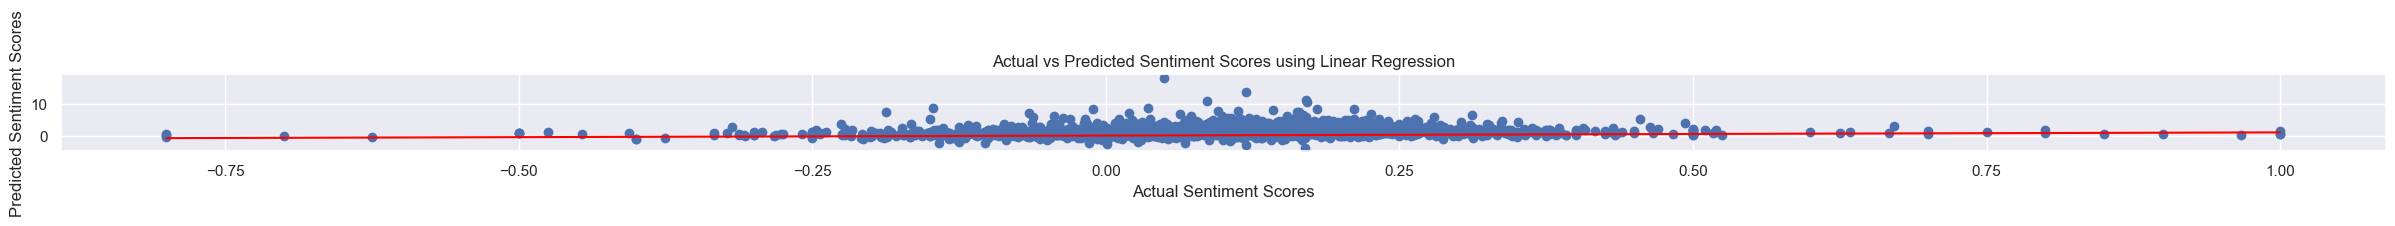

In [56]:
import matplotlib.pyplot as plt
plt.scatter(test_data['sentiment'], test_data['predicted_sentiment'])
plt.xlabel("Actual Sentiment Scores")
plt.ylabel("Predicted Sentiment Scores")
plt.title("Actual vs Predicted Sentiment Scores using Linear Regression")

# Add a diagonal line to show perfect predictions
x = np.linspace(min(test_data['sentiment']), max(test_data['sentiment']), 100)
plt.plot(x, x, color='red')

plt.show()


Model 2: Decision tree regressor

In [57]:
# Define X as 1 dimensional object
X_dt = df_model['text']
y_dt = df_model.compound 

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.15, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Define a function that accepts a vectorizer and a decision tree regressor, and returns the mean squared error, accuracy, precision, recall, and F1 score
def predict_sentiment_score(vectorizer, regressor):
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vectorizer.fit_transform(X_train)
    X_test_dtm = vectorizer.transform(X_test)
    
    # train the decision tree regressor
    regressor.fit(X_train_dtm, y_train)
    
    # make predictions on the test set
    y_pred = regressor.predict(X_test_dtm)
    
    # calculate and return the mean squared error, accuracy, precision, recall, and F1 score
    mse = mean_squared_error(y_test, y_pred)
    acc = accuracy_score(y_test > 0, y_pred > 0)
    prec = precision_score(y_test > 0, y_pred > 0)
    rec = recall_score(y_test > 0, y_pred > 0)
    f1 = f1_score(y_test > 0, y_pred > 0)
    
    return mse, acc, prec, rec, f1

# create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# test the performance of the decision tree regressor with TF-IDF vectorization
tfidf_mse, tfidf_acc, tfidf_prec, tfidf_rec, tfidf_f1 = predict_sentiment_score(tfidf_vectorizer, dt_regressor)

print(f"Mean Squared Error with TF-IDF Vectorization: {tfidf_mse}") 
print(f"Accuracy with TF-IDF Vectorization: {tfidf_acc}")
print(f"Precision with TF-IDF Vectorization: {tfidf_prec}")
print(f"Recall with TF-IDF Vectorization: {tfidf_rec}")
print(f"F1 score with TF-IDF Vectorization: {tfidf_f1}")

#a lower MSE indicates better performance of the model in making predictions
#overfitting: change train size, cross-validation, adjust the hyperparameters

Mean Squared Error with TF-IDF Vectorization: 0.2760044114312268
Accuracy with TF-IDF Vectorization: 0.7369888475836431
Precision with TF-IDF Vectorization: 0.7660208643815202
Recall with TF-IDF Vectorization: 0.803125
F1 score with TF-IDF Vectorization: 0.7841342486651411


In [60]:
# Define the new sentences
new_text = test_data['text']

# Convert the new sentences to document-term matrices using the TF-IDF vectorizer
new_text_dtm = tfidf_vectorizer.transform(new_text)

# Use the decision tree regressor to predict the sentiment scores for the new sentences
new_text_sentiment_scores = dt_regressor.predict(new_text_dtm)

# Print the predicted sentiment scores
print(f"Predicted sentiment scores using Decision Tree: {new_text_sentiment_scores}")
dt1 = pd.DataFrame({'predicted_sentiment': y_pred})
dt1

Predicted sentiment scores using Decision Tree: [-0.0258 -0.4019 -0.3818 ...  0.7096  0.4215  0.4215]


,predicted_sentiment
0,0.451586
1,-0.023568
2,-0.206623
3,0.183339
4,0.344243
...,...
712,0.463921
713,0.507908
714,0.662513
715,0.887408


Model 2: Decision tree with multiple variables

In [61]:
# Define X as a DataFrame with multiple columns
X_dt = df_model[['text', 'likes', 'sentiment']]
y_dt = df_model.compound 

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.12, random_state=35)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Define a function that accepts a vectorizer and a decision tree regressor, and returns the mean squared error, accuracy, precision, recall, and F1 score
def predict_sentiment_score(vectorizer, regressor):
    
    # create document-term matrices using the vectorizer
    X_train_text = vectorizer.fit_transform(X_train['text'])
    X_test_text = vectorizer.transform(X_test['text'])
    
    # combine the text, likes, and sentiment data into a sparse matrix
    import scipy.sparse as sp
    X_train_likes = sp.csr_matrix(X_train['likes'].values.reshape(-1, 1))
    X_test_likes = sp.csr_matrix(X_test['likes'].values.reshape(-1, 1))
    X_train_sentiment = sp.csr_matrix(X_train['sentiment'].values.reshape(-1, 1))
    X_test_sentiment = sp.csr_matrix(X_test['sentiment'].values.reshape(-1, 1))
    X_train_combined = sp.hstack([X_train_text, X_train_likes, X_train_sentiment])
    X_test_combined = sp.hstack([X_test_text, X_test_likes, X_test_sentiment])
    
    # train the decision tree regressor
    regressor.fit(X_train_combined, y_train)
    
    # make predictions on the test set
    y_pred = regressor.predict(X_test_combined)
    
    # calculate and return the mean squared error, accuracy, precision, recall, and F1 score
    mse = mean_squared_error(y_test, y_pred)
    acc = accuracy_score(y_test > 0, y_pred > 0)
    prec = precision_score(y_test > 0, y_pred > 0)
    rec = recall_score(y_test > 0, y_pred > 0)
    f1 = f1_score(y_test > 0, y_pred > 0)
    
    return mse, acc, prec, rec, f1

# create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=35)

# test the performance of the decision tree regressor with TF-IDF vectorization
tfidf_mse, tfidf_acc, tfidf_prec, tfidf_rec, tfidf_f1 = predict_sentiment_score(tfidf_vectorizer, dt_regressor)

print(f"Mean Squared Error with TF-IDF Vectorization: {tfidf_mse}") 
print(f"Accuracy with TF-IDF Vectorization: {tfidf_acc}")
print(f"Precision with TF-IDF Vectorization: {tfidf_prec}")
print(f"Recall with TF-IDF Vectorization: {tfidf_rec}")
print(f"F1 score with TF-IDF Vectorization: {tfidf_f1}")



Mean Squared Error with TF-IDF Vectorization: 0.24083565019744485
Accuracy with TF-IDF Vectorization: 0.794425087108014
Precision with TF-IDF Vectorization: 0.8257713248638838
Recall with TF-IDF Vectorization: 0.8488805970149254
F1 score with TF-IDF Vectorization: 0.8371665133394665


In [62]:
# Define new_X as a DataFrame with multiple columns
new_texts = ["This movie was really really great!", "This movie was terrible!"]
new_likes = [100, 50]
new_sentiments = [0.9, -0.3]
new_X = pd.DataFrame({'text': new_texts, 'likes': new_likes, 'sentiment': new_sentiments})

# create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define a function that accepts a vectorizer and a decision tree regressor, and returns the predicted sentiment score
def predict_sentiment_score(vectorizer, regressor, new_X):
    
    # create document-term matrices using the vectorizer
    X_train_text = vectorizer.fit_transform(X_dt['text'])
    new_X_text = vectorizer.transform(new_X['text'])
    
    # combine the text, likes, and sentiment data into a sparse matrix
    import scipy.sparse as sp
    X_train_likes = sp.csr_matrix(X_dt['likes'].values.reshape(-1, 1))
    new_X_likes = sp.csr_matrix(new_X['likes'].values.reshape(-1, 1))
    X_train_sentiment = sp.csr_matrix(X_dt['sentiment'].values.reshape(-1, 1))
    new_X_sentiment = sp.csr_matrix(new_X['sentiment'].values.reshape(-1, 1))
    X_train_combined = sp.hstack([X_train_text, X_train_likes, X_train_sentiment])
    new_X_combined = sp.hstack([new_X_text, new_X_likes, new_X_sentiment])
    
    # train the decision tree regressor
    regressor.fit(X_train_combined, y_dt)
    
    # make predictions on the new data
    new_scores = regressor.predict(new_X_combined)
    
    return new_scores

# test the performance of the decision tree regressor with TF-IDF vectorization on the new data
new_scores = predict_sentiment_score(tfidf_vectorizer, dt_regressor, new_X)

print(f"Predicted sentiment scores for new texts with TF-IDF Vectorization: {new_scores}")


Predicted sentiment scores for new texts with TF-IDF Vectorization: [ 0.8316 -0.7615]


Model 3: random forest regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Define X and y
X_rf = df_model[['text', 'likes']]
y_rf = df_model['compound']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization to text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

# Concatenate the text features with the likes feature
X_train_combined = np.concatenate([X_train_tfidf.toarray(), X_train['likes'].values.reshape(-1, 1)], axis=1)
X_test_combined = np.concatenate([X_test_tfidf.toarray(), X_test['likes'].values.reshape(-1, 1)], axis=1)

# Train the model on the combined data
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_combined, y_train)
y_pred = rf.predict(X_test_combined)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R-squared: ", r2)

MSE:  0.24046836053461912
R-squared:  0.19560152322600866


In [64]:
# Define new text data
new_text = ["This movie was really really great!", "This movie was terrible!"]
new_likes = [100, 50]

# Apply TF-IDF vectorization to new text data
new_text_tfidf = tfidf_vectorizer.transform(new_text)

# Concatenate the text features with the likes feature
new_combined = np.concatenate([new_text_tfidf.toarray(), np.array(new_likes).reshape(-1, 1)], axis=1)

# Use the trained model to predict the sentiment scores for the new data
new_predictions = rf.predict(new_combined)

# Output the predicted sentiment scores
print("Predicted sentiment scores using Random Forest:", new_predictions)


Predicted sentiment scores using Random Forest: [0.70907507 0.07806823]


In [ ]:
#apply to column 
# import pandas as pd

# # create a sample DataFrame
# data = {'text': ['this is a good movie', 'this is a bad movie', 'I liked this movie']}
# df = pd.DataFrame(data)

# # define a function to apply to the 'text' column
# def get_sentiment_score(text):
#     # your code to predict sentiment score goes here
#     return sentiment_score

# # apply the function to the 'text' column and create a new column called 'sentiment_score'
# df['sentiment_score'] = df['text'].apply(get_sentiment_score)

# # print the new DataFrame
# print(df)


In [ ]:
#https://techvidvan.com/tutorials/python-sentiment-analysis/